# Case Study 0: Fall Creek Watershed, NY

Reads, graphs and performs sensitivity analysis for observations, parameters and models from 24,000 SWMM model runs.

In [2]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

# Specify folder location
folder = '/Users/catiefinkenbiner/Documents/Summer Institute/CaseStudies/Case Study 0/FallCreekWS/SWMM_24000'

# observations for objective functions
#df_obs = pd.read_csv(folder+'/observation_ts.csv')

# parameters for the 24,000 model runs
df_parms = pd.read_csv(folder+'/params.csv',header=None)
df_parms.columns = ['w', 'n_imperv', 'n_perv', 's_imperv', 's_perv', 'k_sat', 'per_routed', 'cmelt', 'Tb', 'A1', 'B1']

# model results
#df_model = pd.read_csv(folder+'/simulation_ts.csv')

# calculated objective functions
df_OFs = pd.read_csv(folder+'/OF_values.csv')

### 1. Graph Observed and Modeled Output

In [ ]:
# Add R code here for timeseries plotting here

### 2. Approximate Bayesian Calculation
Approximate Bayesian computation (ABC) represents the combination of model parameter values that maximize the probability of representing the observed data. ABC bypasses the evaluation of the likelihood function by approximating the likelihood function by using simulations compared to the observed data. For more information on ABC, see Engeland and Gottschalk (2002), Neuman (2003), Sunnaker et al. (2013) etc. 

The steps and requirements for approximate Bayesian calculation are: 1) Observed data has a known mean and standard deviation and the user defines a summary statistic (i.e. objective function) 2) Assume you don’t know anything about the parameters, so assume a uniform prior interval [0,1]. 3) A total of n parameters are drawn from prior, the model is simulated for each of the parameter points , which results in n sequences of simulated data. 4) Calculate the summary statistic for each sequence of simulated data 5) Calculate distance between observed and simulated transition frequencies for all parameter points. Specify some tolerance  and “keep” parameter points smaller than or equal to the summary statistic as approximate samples from the posterior.

For the python script below, specify the number of model runs, tolerance of the objective functions, number of histogram bins and the figure colors. Here we used pre-defined objective functions, but the code can be modified to calculate a variety of objective functions. The plots produced are histograms of the various parameters illustrating the difference between original modeled output and the ABC constrained parameter sets.

In [ ]:
# %load approx_bayes_calc_of_defined.py 
#!/usr/bin/env python3
"""
Created on Mon Jul  8 12:57:45 2019

@author: catiefinkenbiner
"""
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

'''
Approximate Baysian Calculation requires:
    1) observation dataset (df_obs)
    2) parameter sets (df_parms)
    3) model output (df_model)
    4) objective functions (df_OFs)
    5) tolerance
    6) number of model runs
'''

def approx_bayes_calc_OF(parms,OFs,simulations):
    keep_nse = []; keep_pbias = []; keep_rmse = []
    for i in np.arange((simulations)):
        # User can redefine tolerance and OF here
        if tolerance_rmse < OFs.iloc[i,3]:
            keep_rmse.append(parms.loc[i])
            
        if np.absolute(OFs.iloc[i,4]) < tolerance_pbias:
            keep_pbias.append(parms.loc[i])
            
        if OFs.iloc[i,5] >= tolerance_nse:
            keep_nse.append(parms.loc[i])        
    return keep_nse,keep_pbias,keep_rmse

plt.rcParams.update({'font.size': 18})
def make_histograms(df_parms,bayes_approx,bins,alpha,cc1,cc2,parameters,metric):
    plt.figure(figsize=(12,12))
    for col in np.arange(1,((df_parms.iloc[0,:]).size)):
        plt.subplot(4,3,col)
        ax = df_parms.iloc[:,col].plot.hist(bins=bins,alpha=alpha,color=cc1)    
        ax = bayes_approx.iloc[:,col].plot.hist(bins=bins,alpha=alpha,color=cc2)
        ax.set_xlabel(str(parameters[col]))    
    plt.legend(['Output','ABC'],fancybox=True)
    plt.tight_layout() 
    plt.savefig(metric+'.png',dpi=300)

def runABC(df_parms,df_OFs,runs,bins,color1,color2):
    # models with objective functions within tolerance thresholds
    results_nse,results_pbias,results_rmse = np.array(approx_bayes_calc_OF(df_parms,df_OFs,runs))
    
    # saves models with objective functions within tolerance thresholds
    bayes_approx_nse = pd.DataFrame(results_nse,columns=None)
    bayes_approx_pbias = pd.DataFrame(results_pbias,columns=None)
    bayes_approx_rmse = pd.DataFrame(results_rmse,columns=None)
    parameters = list(df_parms.columns.values)
    
    # print ABC results and make figures
    print('precent of models with NSE >= to',str(tolerance_nse),'are:',str(len(results_nse)/runs),'%')
    make_histograms(df_parms,bayes_approx_nse,bins,0.5,color1,color2,parameters,'NSE')
    print('precent of models with',str(-tolerance_pbias),'<= p-bias >=',str(tolerance_pbias),'are:',str(len(results_pbias)/runs),'%')
    make_histograms(df_parms,bayes_approx_pbias,bins,0.5,color1,color3,parameters,'pbias')
    print('precent of models with RMSE < to',str(tolerance_rmse),'are:',str(len(results_rmse)/runs),'%')
    make_histograms(df_parms,bayes_approx_rmse,bins,0.5,color1,color4,parameters,'RMSE')


precent of models with NSE >= to 0.0 are: 0.200375 %
precent of models with -15.0 <= p-bias >= 15.0 are: 0.07770833333333334 %
precent of models with RMSE < to 6.0 are: 0.4245 %


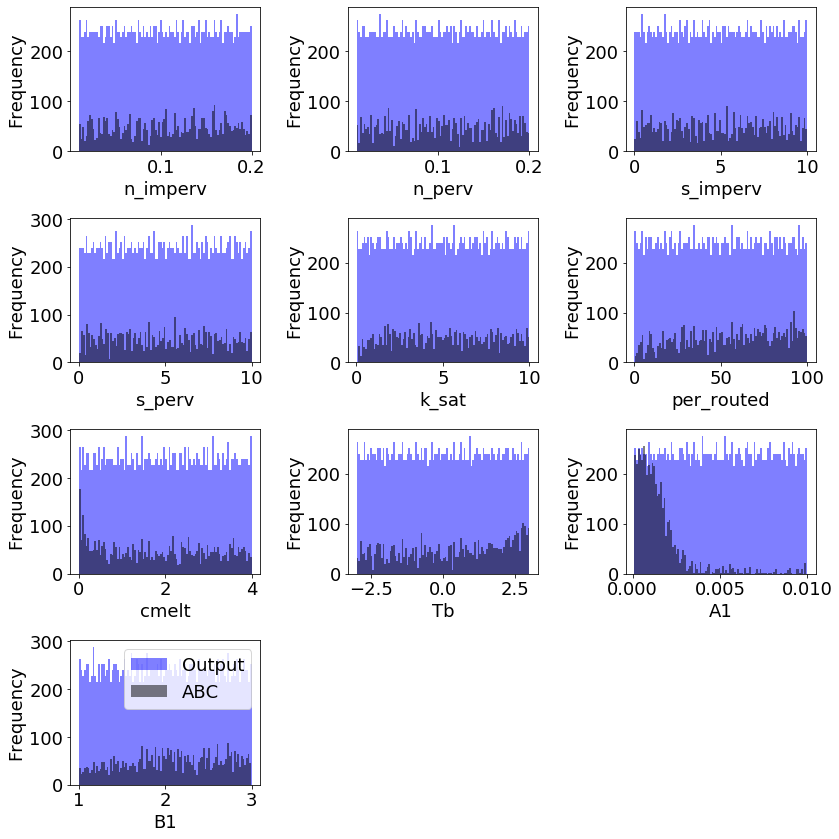

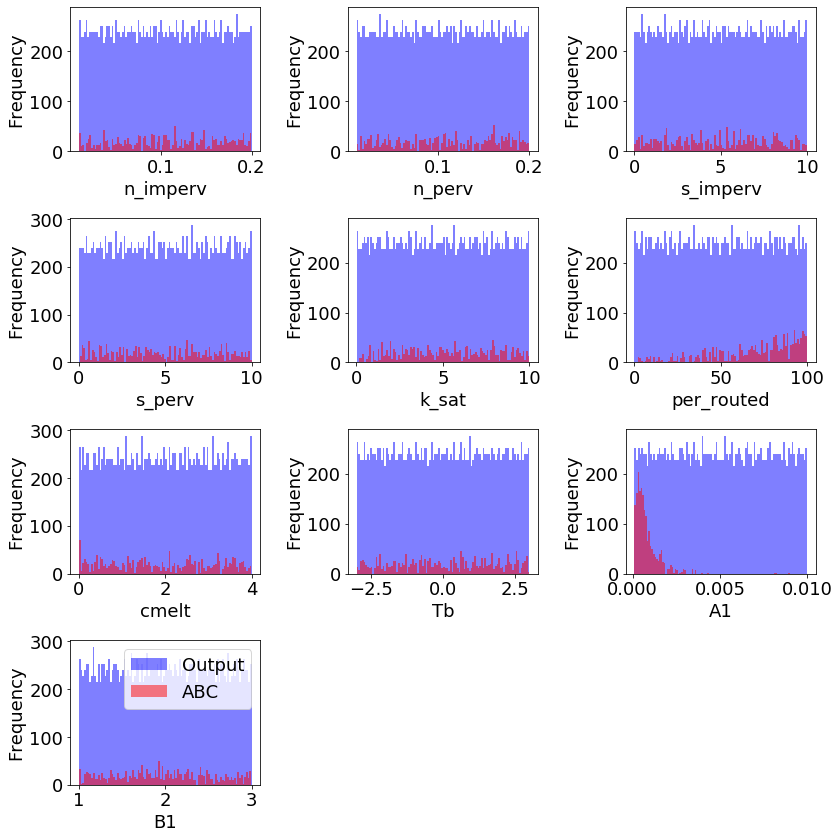

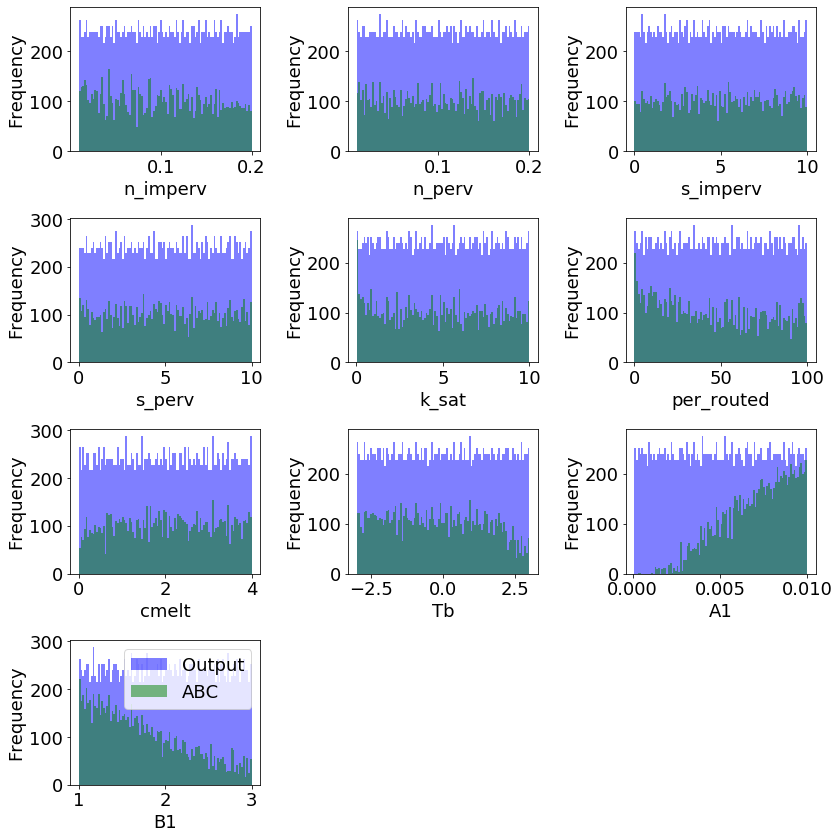

In [17]:
# Specify tolerance for objective functions (OF)
tolerance_rmse = 6.0   # OF < tolerance
tolerance_pbias = 15.0 # -tolerance < OF > tolerance
tolerance_nse = 0.0  # OF >= tolerance

runs = 24000 # specify number of model runs
bins = 100   # specify number of histogram bins
color1 = 'b' # color of original model output
color2 = 'k' # color of 1st ABC applied to OF (NSE)
color3 = 'r' # color of 2nd ABC applied to OF (p-bias)
color4 = 'g' # color of 3rd ABC applied to OF (RMSE)

# Runs function that evaluates models outputs with approximate Bayesian calculations
runABC(df_parms,df_OFs,runs,bins,color1,color2)

### 2. Sobol
write some stuff about this ...



### XX. Conclusion

We did awesome stuff and this is how we feel about it...

### XX. References
- Engeland, K., Gottschalk L. Bayesian estimation of parameters in regional hydrological model, Hydrol. Earth Sys. Sci., **2002**, *6*(5), 883-898. https://doi.org/10.5194/hess-6-883-2002
- Neuman, S. Maximum likelihood Bayesian averaging of uncertain model predictions, Stoch. Environ. Res. Risk Assess. **2003** *17*, 291. https://doi.org/10.1007/s00477-003-0151-7
- Sunnåker M., Busetto A.G., Numminen E., Corander J., Foll M., Dessimoz C. Approximate Bayesian Computation, PLoS Comput. Biol. **2013** *9*(1): e1002803. https://doi.org/10.1371/journal.pcbi.1002803
